In [1]:
import cv2
import matplotlib.pyplot as plt

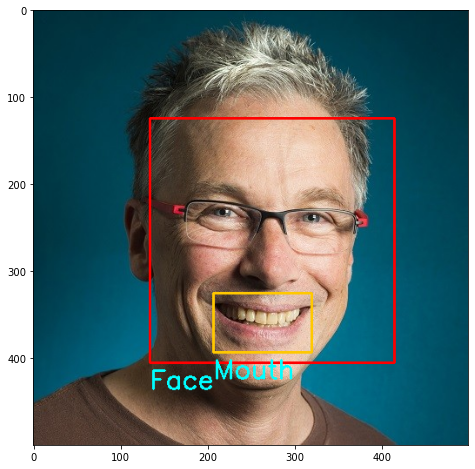

In [10]:
img = cv2.imread('SmilingFace.jpg')
gray = cv2.imread('SmilingFace.jpg',0)
font = cv2.FONT_HERSHEY_SIMPLEX

face_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
mouth_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_mcs_mouth.xml')

faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 5,
                                         minSize=(20,20))
mouthes = mouth_classifier.detectMultiScale(gray, scaleFactor = 1.04, minNeighbors = 200,
                                           minSize=(50,50))

for face in faces:
    x, y, w, h = face
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.putText(img, 'Face', (x, y+h+30), font, 1, (255,255,0), 2)

for mouth in mouthes:
    x, y, w, h = mouth
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,200,255), 2)
    cv2.putText(img, 'Mouth', (x, y+h+30), font, 1, (255,255,0), 2)

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])

In [9]:
import time
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_SIMPLEX
while cap.isOpened():
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if ret:

        face_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
        mouth_classifier =  cv2.CascadeClassifier('haarcascades/haarcascade_mcs_mouth.xml')

        faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.013, minNeighbors = 5,
                                                minSize=(20,20))
        mouthes = mouth_classifier.detectMultiScale(gray, scaleFactor = 1.04, minNeighbors = 200,
                                                minSize=(50,50))

        for face in faces:
            x, y, w, h = face
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 2)
            cv2.putText(img, 'Face', (x, y+h+30), font, 1, (255,255,0), 2)

        for mouth in mouthes:
            x, y, w, h = mouth
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,200,255), 2)
            cv2.putText(img, 'Mouth', (x, y+h+30), font, 1, (255,255,0), 2)

        cv2.imshow('Camera', img)
        k = cv2.waitKey(1)
        if k == ord('q'):
            break

        # time.sleep(0.5)
    else:
        break
print('Destroying....')
cap.release()
cv2.destroyAllWindows()

Destroying....
